> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate tmdb-movies dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [71]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 



# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [72]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


In [73]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
#   types and look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [74]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df = df.drop(['tagline','imdb_id','production_companies','keywords','homepage','cast'],axis = 1)

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10799 entries, 0 to 10865
Data columns (total 15 columns):
id                10799 non-null int64
popularity        10799 non-null float64
budget            10799 non-null int64
revenue           10799 non-null int64
original_title    10799 non-null object
director          10799 non-null object
overview          10799 non-null object
runtime           10799 non-null int64
genres            10799 non-null object
release_date      10799 non-null object
vote_count        10799 non-null int64
vote_average      10799 non-null float64
release_year      10799 non-null int64
budget_adj        10799 non-null float64
revenue_adj       10799 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 1.3+ MB


In [75]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [76]:
bm = df['budget'].mean()
rm = df['revenue'].mean()
df['budget'] = df['budget'].replace(0,bm)
df['revenue'] = df['revenue'].replace(0,rm)

In [77]:
df.drop_duplicates(inplace = True)

In [78]:
df.nunique()

id                10798
popularity        10748
budget              556
revenue            4702
original_title    10505
director           5054
overview          10784
runtime             245
genres             2031
release_date       5886
vote_count         1289
vote_average         71
release_year         56
budget_adj         2610
revenue_adj        4839
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf61204160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcf6781a048>]], dtype=object)

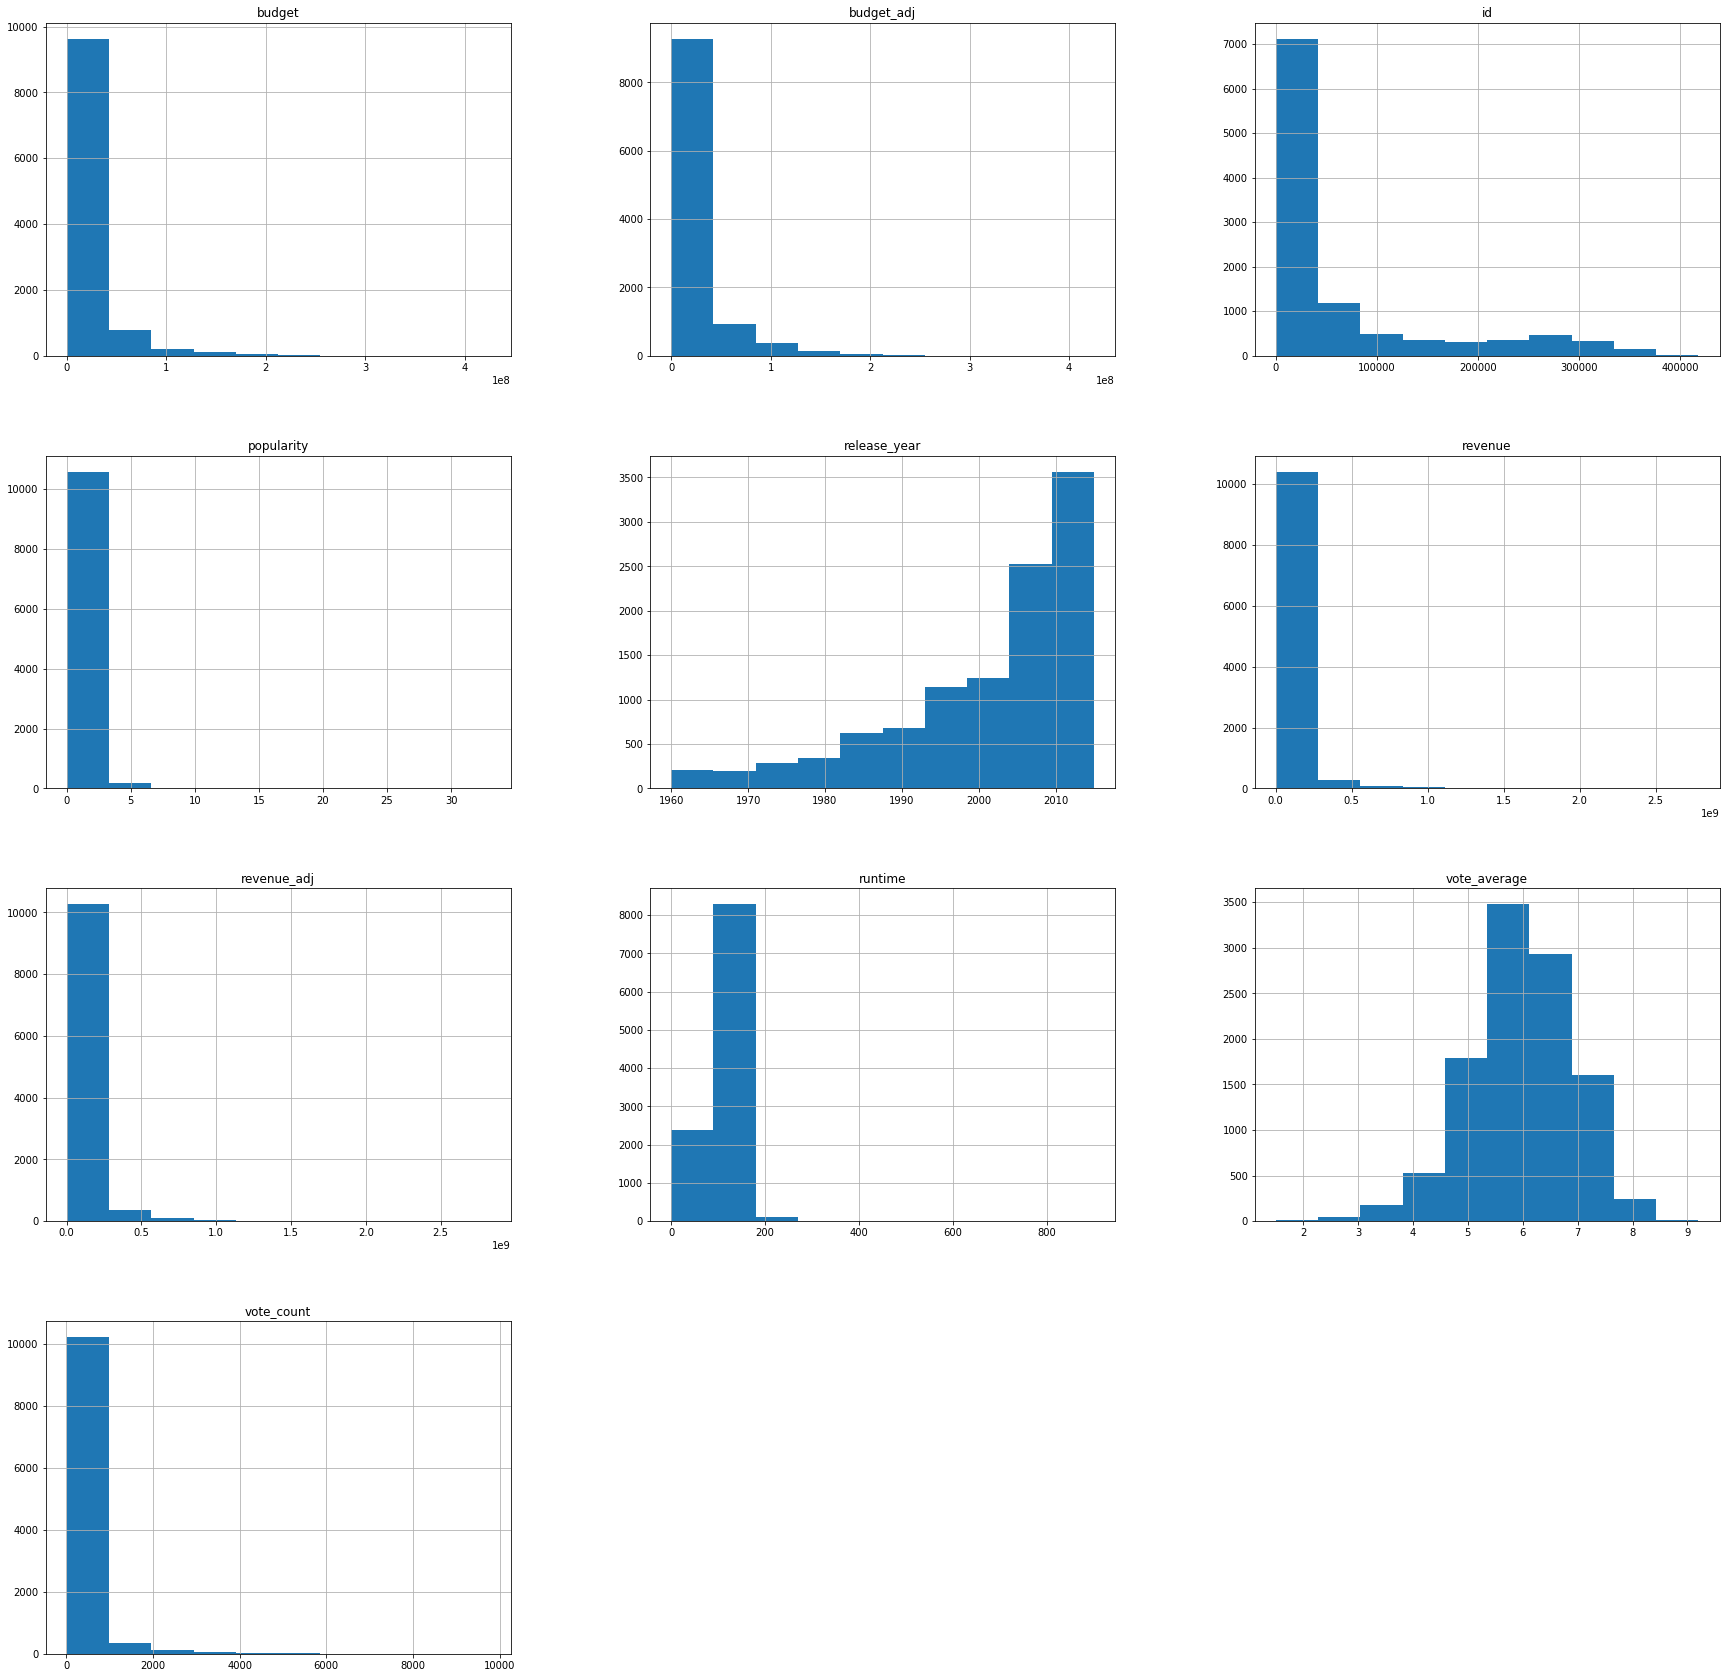

In [79]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(30,30))

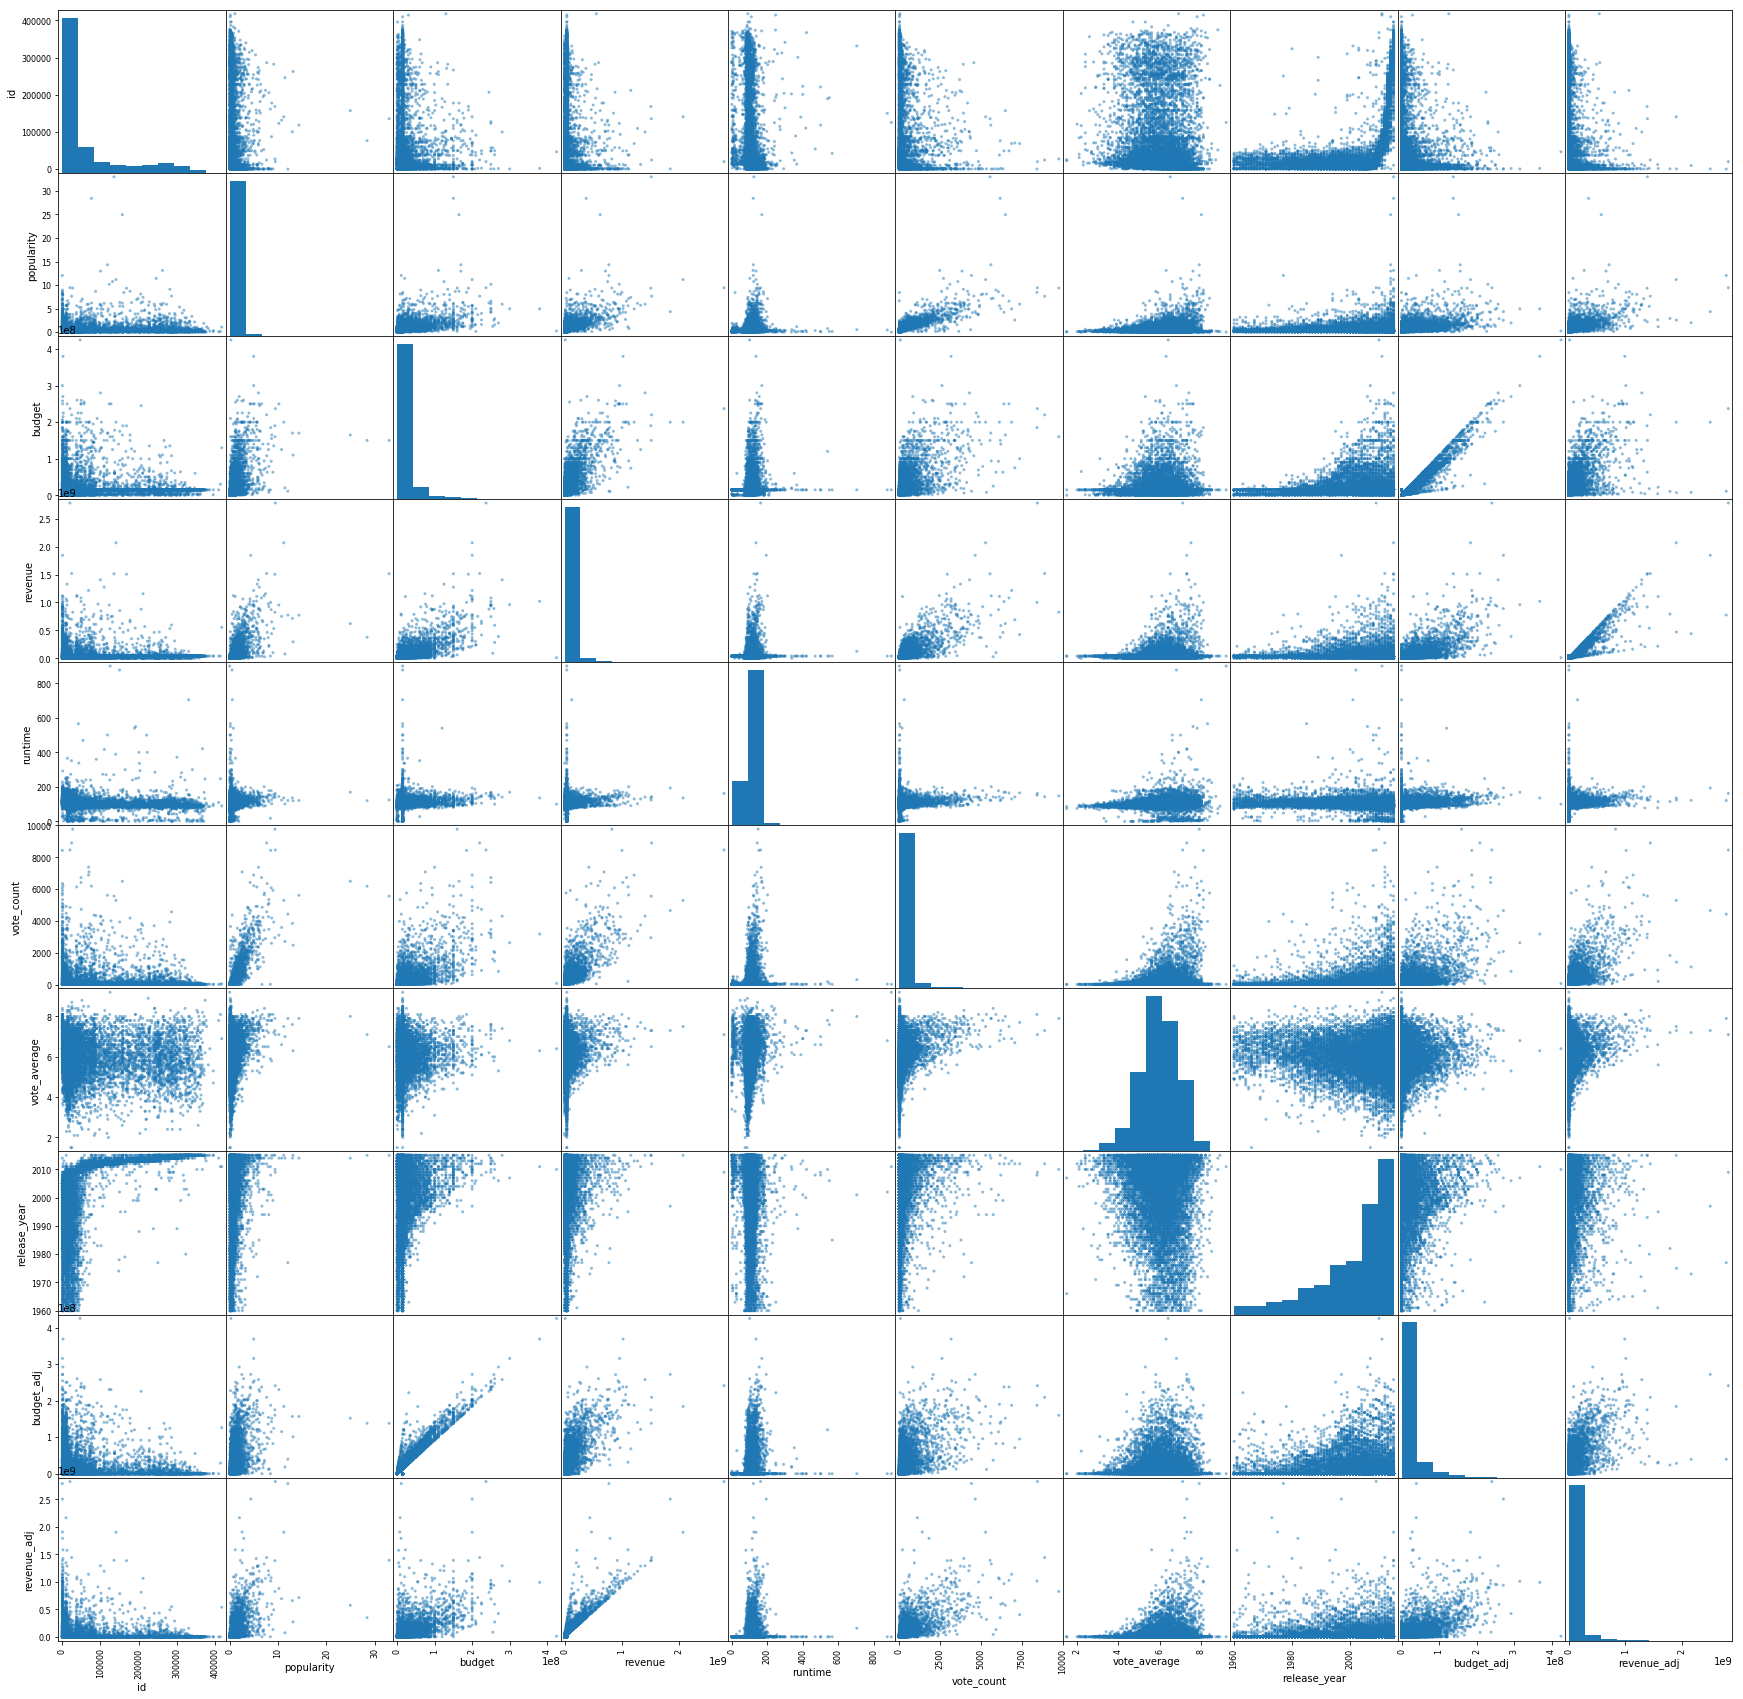

In [80]:
pd.plotting.scatter_matrix(df, figsize = (30,30));


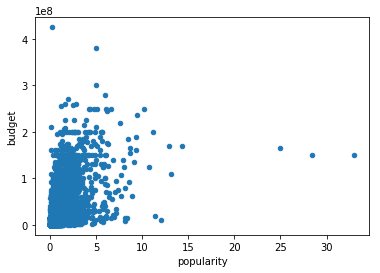

In [81]:
df.plot(x='popularity', y= 'budget', kind = 'scatter');


In [ ]:
#buget and popularity doesnt have a strong releation 

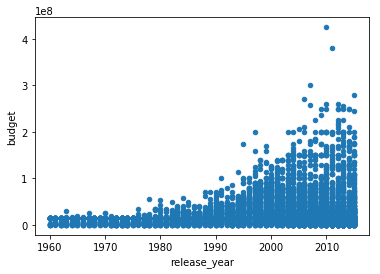

In [82]:
df.plot(x='release_year', y= 'budget', kind = 'scatter');

In [ ]:
#the budget of movies is incrasing we can see that 2010 is much higher than previous year and we can expect that for next year it will continue to increase

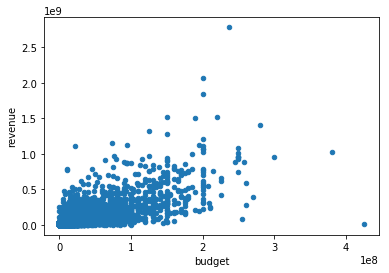

In [83]:
df.plot(x='budget', y= 'revenue', kind = 'scatter');

In [ ]:
#there is a big chace that your movie wont make the cost of making it so it is not important how much you pay as 

In [87]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.groupby(['release_year'])['budget'].mean()

release_year
1960    1.126589e+07
1961    1.003265e+07
1962    9.987410e+06
1963    1.211126e+07
1964    1.180135e+07
1965    1.209634e+07
1966    1.212770e+07
1967    1.050444e+07
1968    1.090015e+07
1969    1.132742e+07
1970    1.273898e+07
1971    9.943380e+06
1972    9.368266e+06
1973    1.108466e+07
1974    9.670694e+06
1975    1.131221e+07
1976    1.199167e+07
1977    1.057962e+07
1978    1.181812e+07
1979    1.298979e+07
1980    1.351433e+07
1981    1.173621e+07
1982    1.376170e+07
1983    1.384648e+07
1984    1.409230e+07
1985    1.415398e+07
1986    1.324104e+07
1987    1.379848e+07
1988    1.429461e+07
1989    1.551269e+07
1990    1.768717e+07
1991    1.899047e+07
1992    1.836394e+07
1993    1.737047e+07
1994    2.003271e+07
1995    2.323624e+07
1996    2.425185e+07
1997    3.065305e+07
1998    2.843423e+07
1999    3.066465e+07
2000    3.079360e+07
2001    2.939436e+07
2002    2.769236e+07
2003    2.890894e+07
2004    2.929979e+07
2005    2.655335e+07
2006    2.501249e+07


In [89]:
gp = df.groupby(['genres'])['popularity'].mean()
print(gp)

genres
Action                                                 0.591587
Action|Adventure                                       0.690710
Action|Adventure|Animation                             0.454663
Action|Adventure|Animation|Comedy|Drama                0.370019
Action|Adventure|Animation|Comedy|Family               0.063246
Action|Adventure|Animation|Drama|Family                0.132458
Action|Adventure|Animation|Family                      0.538717
Action|Adventure|Animation|Family|Fantasy              0.801691
Action|Adventure|Animation|Family|Mystery              0.201030
Action|Adventure|Animation|Family|Science Fiction      1.065533
Action|Adventure|Animation|Fantasy                     0.070257
Action|Adventure|Animation|Fantasy|Horror              0.155075
Action|Adventure|Animation|Fantasy|Science Fiction     0.200594
Action|Adventure|Animation|Science Fiction             0.427687
Action|Adventure|Animation|Science Fiction|Crime       0.559451
Action|Adventure|Animation|Scienc

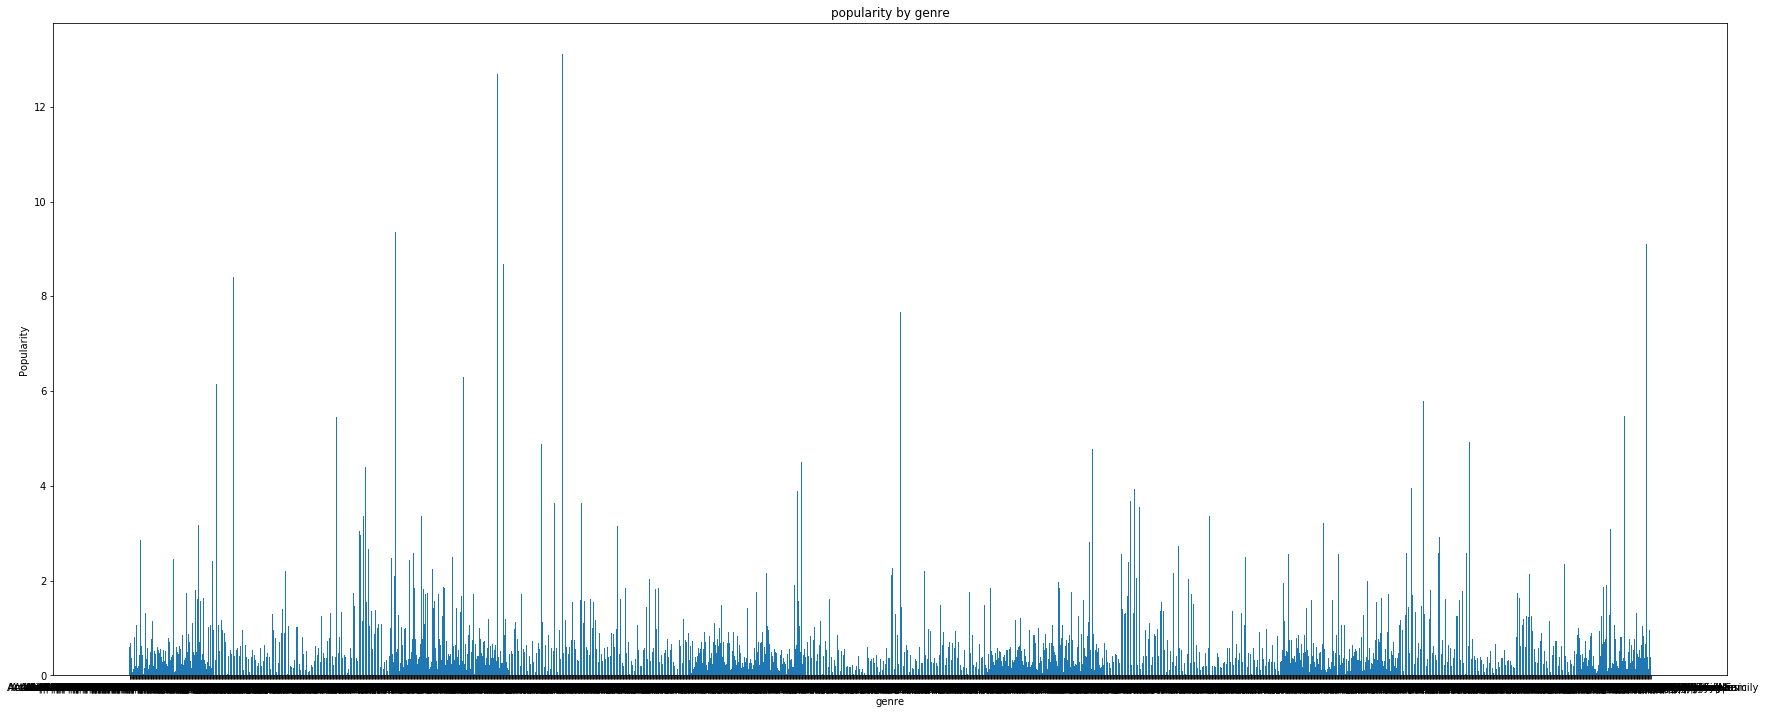

In [91]:
df_census['education'].value_counts().plot(kind='bar');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])